# **Credit Scoring Model**

##**Data Understanding**

**Import Library**

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Import Dataset**

In [2]:
!wget --no-check-certificate \
  https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip \
  -O /tmp/home-credit-default-risk.zip

--2022-12-04 16:11:56--  https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip
Resolving rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)... 52.219.164.83
Connecting to rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)|52.219.164.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721616255 (688M) [application/zip]
Saving to: ‘/tmp/home-credit-default-risk.zip’

/tmp/home-credit-de 100%[===================>] 688.19M  12.9MB/s    in 56s     

2022-12-04 16:12:53 (12.3 MB/s) - ‘/tmp/home-credit-default-risk.zip’ saved [721616255/721616255]



In [3]:
import zipfile
import os

local_zip = '/tmp/home-credit-default-risk.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/home-credit-dataset')
zip_ref.close()

In [4]:
base_dir = '/tmp/home-credit-dataset'

In [5]:
train = pd.read_csv(base_dir + '/application_train.csv')
test = pd.read_csv(base_dir + '/application_test.csv')

## **Exploratory Data Analysis**

## **Data Preprocessing**

In [6]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [8]:
train.shape

(307511, 122)

In [9]:
test.shape

(48744, 121)

In [10]:
train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
test.isnull().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [12]:
train.columns[44:95]

Index(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_M

In [13]:
train.columns[96:122]

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [14]:
cols_to_drop = [
    'OWN_CAR_AGE', 'OCCUPATION_TYPE'
    , 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
    , 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG'
    , 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG'
    , 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG'
    , 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG'
    , 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE'
    , 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE'
    , 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE'
    , 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE'
    , 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI'
    , 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI'
    , 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI'
    , 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI'
    , 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI'
    , 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE'
    , 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE'
    , 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'
    , 'DEF_60_CNT_SOCIAL_CIRCLE'
    , 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY'
    , 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON'
    , 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
    , 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4'
    , 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7'
    , 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10'
    , 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13'
    , 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16'
    , 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19'
    , 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]

train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop, axis=1)

In [15]:
train = train.dropna()
test = test.dropna()

In [16]:
train.shape

(306206, 40)

In [17]:
test.shape

(47809, 39)

In [18]:
print('Data Train Shape = {}'.format(train.shape))
print('Data Test Shape = {}'.format(test.shape))

Data Train Shape = (306206, 40)
Data Test Shape = (47809, 39)


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306206 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   306206 non-null  int64  
 1   TARGET                       306206 non-null  int64  
 2   NAME_CONTRACT_TYPE           306206 non-null  object 
 3   CODE_GENDER                  306206 non-null  object 
 4   FLAG_OWN_CAR                 306206 non-null  object 
 5   FLAG_OWN_REALTY              306206 non-null  object 
 6   CNT_CHILDREN                 306206 non-null  int64  
 7   AMT_INCOME_TOTAL             306206 non-null  float64
 8   AMT_CREDIT                   306206 non-null  float64
 9   AMT_ANNUITY                  306206 non-null  float64
 10  AMT_GOODS_PRICE              306206 non-null  float64
 11  NAME_TYPE_SUITE              306206 non-null  object 
 12  NAME_INCOME_TYPE             306206 non-null  object 
 13 

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47809 entries, 0 to 48743
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   47809 non-null  int64  
 1   NAME_CONTRACT_TYPE           47809 non-null  object 
 2   CODE_GENDER                  47809 non-null  object 
 3   FLAG_OWN_CAR                 47809 non-null  object 
 4   FLAG_OWN_REALTY              47809 non-null  object 
 5   CNT_CHILDREN                 47809 non-null  int64  
 6   AMT_INCOME_TOTAL             47809 non-null  float64
 7   AMT_CREDIT                   47809 non-null  float64
 8   AMT_ANNUITY                  47809 non-null  float64
 9   AMT_GOODS_PRICE              47809 non-null  float64
 10  NAME_TYPE_SUITE              47809 non-null  object 
 11  NAME_INCOME_TYPE             47809 non-null  object 
 12  NAME_EDUCATION_TYPE          47809 non-null  object 
 13  NAME_FAMILY_STAT

In [21]:
train.nunique()

SK_ID_CURR                     306206
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2518
AMT_CREDIT                       5585
AMT_ANNUITY                     13655
AMT_GOODS_PRICE                   985
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  5
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17458
DAYS_EMPLOYED                   12566
DAYS_REGISTRATION               15684
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          1
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

In [22]:
test.nunique()

SK_ID_CURR                     47809
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      11
AMT_INCOME_TOTAL                 599
AMT_CREDIT                      2912
AMT_ANNUITY                     7442
AMT_GOODS_PRICE                  671
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   7
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 5
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        81
DAYS_BIRTH                     15414
DAYS_EMPLOYED                   7815
DAYS_REGISTRATION              12573
DAYS_ID_PUBLISH                 5874
FLAG_MOBIL                         2
FLAG_EMP_PHONE                     2
FLAG_WORK_PHONE                    2
FLAG_CONT_MOBILE                   2
FLAG_PHONE                         2
FLAG_EMAIL                         2
CNT_FAM_MEMBERS                   12
R

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

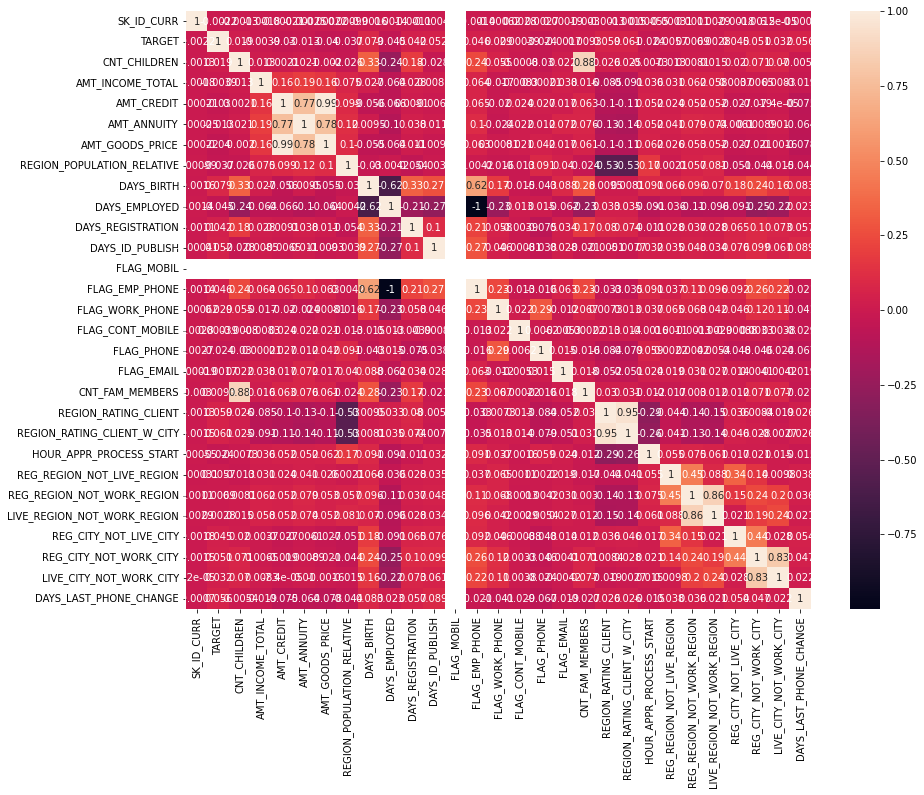

In [24]:
plt.figure(figsize=(14,11))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [25]:
corr_matrix = train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr_train = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-25-a59e94ae1030>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [26]:
to_drop_hicorr_train

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY']

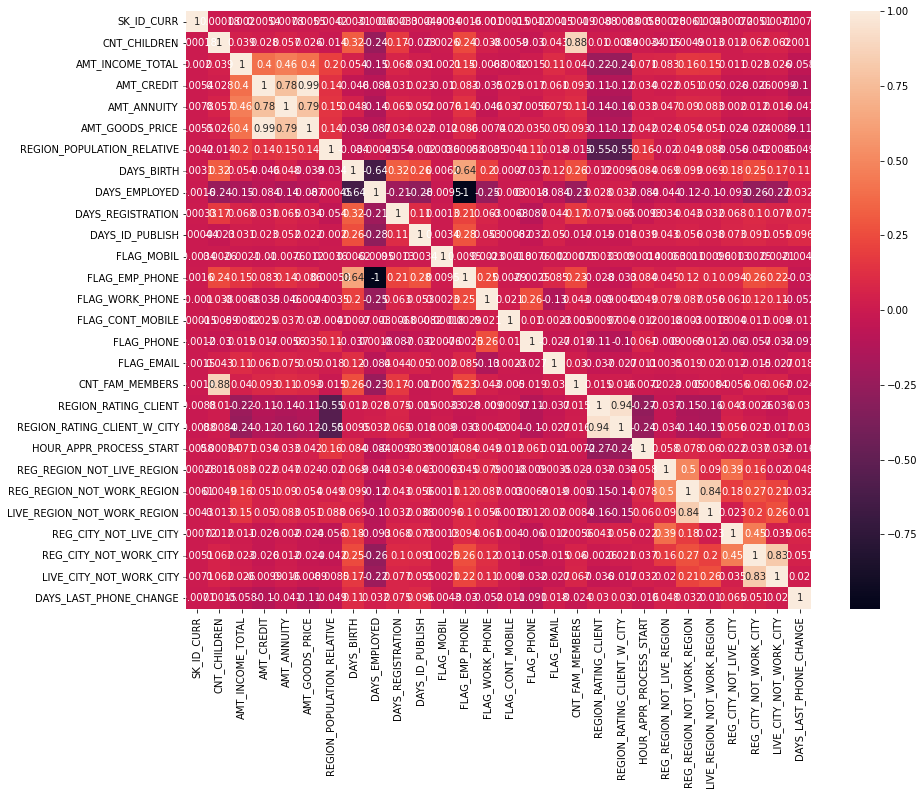

In [27]:
plt.figure(figsize=(14,11))
sns.heatmap(test.corr(),annot=True)
plt.show()

In [28]:
corr_matrix = test.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr_test = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-28-64974b058768>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [29]:
to_drop_hicorr_test

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY']

In [30]:
train['TARGET'].value_counts()

0    281451
1     24755
Name: TARGET, dtype: int64

In [31]:
train['TARGET'].value_counts(normalize=True)*100

0    91.915573
1     8.084427
Name: TARGET, dtype: float64

In [32]:
train.drop(to_drop_hicorr_train, axis=1, inplace=True)
test.drop(to_drop_hicorr_test, axis=1, inplace=True)

In [33]:
train = train.drop('SK_ID_CURR', axis=1)
test = test.drop('SK_ID_CURR', axis=1)

In [34]:
train.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE
count,306206.000000,306206.000000,3.062060e+05,3.062060e+05,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.0,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000
mean,0.080844,0.417026,1.687826e+05,5.987994e+05,0.020865,-16040.685388,63860.880737,-4987.966444,-2994.348181,1.0,0.199056,0.998125,0.280765,0.056795,2.052635,12.061948,0.015160,0.050737,0.078157,0.230482,-964.427248
std,0.272596,0.722117,2.375210e+05,4.019609e+05,0.013830,4362.860340,141315.195242,3522.537608,1509.514607,0.0,0.399291,0.043256,0.449374,0.231451,0.509099,3.266168,0.122188,0.219461,0.268418,0.421142,826.705518
min,0.000000,0.000000,2.565000e+04,4.500000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,0.010006,-19685.000000,-2761.000000,-7481.000000,-4299.000000,1.0,0.000000,1.000000,0.000000,0.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,-1571.000000
50%,0.000000,0.000000,1.476000e+05,5.135310e+05,0.018850,-15756.000000,-1214.000000,-4507.000000,-3255.000000,1.0,0.000000,1.000000,0.000000,0.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,-759.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,0.028663,-12418.000000,-289.000000,-2013.000000,-1720.000000,1.0,0.000000,1.000000,1.000000,0.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,-276.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [35]:
test.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE
count,47809.000000,4.780900e+04,4.780900e+04,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000
mean,0.397122,1.784117e+05,5.169017e+05,0.021222,-16059.754983,67200.385555,-4968.815788,-3050.470309,0.999979,0.206363,0.998369,0.264134,0.162041,2.038194,12.010877,0.018909,0.055408,0.077580,0.224958,-1077.961012
std,0.708086,1.013959e+05,3.653443e+05,0.014436,4322.246842,144122.674007,3553.230598,1569.156523,0.004573,0.404698,0.040359,0.440876,0.368492,0.523028,3.278606,0.136204,0.228777,0.267512,0.417559,878.432327
min,0.000000,2.700000e+04,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,-6348.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4361.000000
25%,0.000000,1.125000e+05,2.606400e+05,0.010006,-19619.000000,-2912.000000,-7466.000000,-4447.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,-1767.000000
50%,0.000000,1.575000e+05,4.500000e+05,0.018850,-15778.000000,-1295.000000,-4493.000000,-3229.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,-864.000000
75%,1.000000,2.250000e+05,6.750000e+05,0.028663,-12493.000000,-298.000000,-1901.000000,-1705.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,-364.000000
max,20.000000,4.410000e+06,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [36]:
train.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [37]:
test.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [38]:
train.select_dtypes(exclude='object').nunique()

TARGET                            2
CNT_CHILDREN                     15
AMT_INCOME_TOTAL               2518
AMT_CREDIT                     5585
REGION_POPULATION_RELATIVE       81
DAYS_BIRTH                    17458
DAYS_EMPLOYED                 12566
DAYS_REGISTRATION             15684
DAYS_ID_PUBLISH                6168
FLAG_MOBIL                        1
FLAG_WORK_PHONE                   2
FLAG_CONT_MOBILE                  2
FLAG_PHONE                        2
FLAG_EMAIL                        2
REGION_RATING_CLIENT              3
HOUR_APPR_PROCESS_START          24
REG_REGION_NOT_LIVE_REGION        2
REG_REGION_NOT_WORK_REGION        2
REG_CITY_NOT_LIVE_CITY            2
REG_CITY_NOT_WORK_CITY            2
DAYS_LAST_PHONE_CHANGE         3773
dtype: int64

In [39]:
test.select_dtypes(exclude='object').nunique()

CNT_CHILDREN                     11
AMT_INCOME_TOTAL                599
AMT_CREDIT                     2912
REGION_POPULATION_RELATIVE       81
DAYS_BIRTH                    15414
DAYS_EMPLOYED                  7815
DAYS_REGISTRATION             12573
DAYS_ID_PUBLISH                5874
FLAG_MOBIL                        2
FLAG_WORK_PHONE                   2
FLAG_CONT_MOBILE                  2
FLAG_PHONE                        2
FLAG_EMAIL                        2
REGION_RATING_CLIENT              3
HOUR_APPR_PROCESS_START          24
REG_REGION_NOT_LIVE_REGION        2
REG_REGION_NOT_WORK_REGION        2
REG_CITY_NOT_LIVE_CITY            2
REG_CITY_NOT_WORK_CITY            2
DAYS_LAST_PHONE_CHANGE         3572
dtype: int64

In [40]:
train.drop(['FLAG_MOBIL'], axis=1, inplace=True)
test.drop(['FLAG_MOBIL'], axis=1, inplace=True)

In [41]:
for col in train.select_dtypes(include='object').columns.tolist():
    print(train[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         90.531211
Revolving loans     9.468789
Name: NAME_CONTRACT_TYPE, dtype: float64


F      65.849461
M      34.149233
XNA     0.001306
Name: CODE_GENDER, dtype: float64


N    65.980745
Y    34.019255
Name: FLAG_OWN_CAR, dtype: float64


Y    69.509415
N    30.490585
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      81.159089
Family             13.111435
Spouse, partner     3.713187
Children            1.066929
Other_B             0.578042
Other_A             0.282816
Group of people     0.088503
Name: NAME_TYPE_SUITE, dtype: float64


Working                 51.640072
Commercial associate    23.269956
Pensioner               18.015323
State servant            7.057014
Unemployed               0.007185
Student                  0.005552
Businessman              0.003266
Maternity leave          0.001633
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    71.057066
Higher education                 24.301614
Incomplete higher                

In [42]:
for col in test.select_dtypes(include='object').columns.tolist():
    print(test[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         99.081763
Revolving loans     0.918237
Name: NAME_CONTRACT_TYPE, dtype: float64


F    67.025037
M    32.974963
Name: CODE_GENDER, dtype: float64


N    66.290866
Y    33.709134
Name: FLAG_OWN_CAR, dtype: float64


Y    68.779937
N    31.220063
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      83.051308
Family             12.294756
Spouse, partner     3.028718
Children            0.853396
Other_B             0.441339
Other_A             0.227991
Group of people     0.102491
Name: NAME_TYPE_SUITE, dtype: float64


Working                 50.442385
Commercial associate    23.372168
Pensioner               18.946224
State servant            7.230856
Student                  0.004183
Businessman              0.002092
Unemployed               0.002092
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    69.744190
Higher education                 25.658349
Incomplete higher                 3.534899
Lower secondary                   0.978895
Ac

In [43]:
train.isnull().sum() * 100 / train.shape[0]

TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
REGION_POPULATION_RELATIVE    0.0
DAYS_BIRTH                    0.0
DAYS_EMPLOYED                 0.0
DAYS_REGISTRATION             0.0
DAYS_ID_PUBLISH               0.0
FLAG_WORK_PHONE               0.0
FLAG_CONT_MOBILE              0.0
FLAG_PHONE                    0.0
FLAG_EMAIL                    0.0
REGION_RATING_CLIENT          0.0
WEEKDAY_APPR_PROCESS_START    0.0
HOUR_APPR_PROCESS_START       0.0
REG_REGION_NOT_LIVE_REGION    0.0
REG_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY        0.0
REG_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_T

In [44]:
test.isnull().sum() * 100 / test.shape[0]

NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
REGION_POPULATION_RELATIVE    0.0
DAYS_BIRTH                    0.0
DAYS_EMPLOYED                 0.0
DAYS_REGISTRATION             0.0
DAYS_ID_PUBLISH               0.0
FLAG_WORK_PHONE               0.0
FLAG_CONT_MOBILE              0.0
FLAG_PHONE                    0.0
FLAG_EMAIL                    0.0
REGION_RATING_CLIENT          0.0
WEEKDAY_APPR_PROCESS_START    0.0
HOUR_APPR_PROCESS_START       0.0
REG_REGION_NOT_LIVE_REGION    0.0
REG_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY        0.0
REG_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE             0.0
DAYS_LAST_PHON

In [45]:
train.select_dtypes(exclude='object').columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [46]:
train.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [47]:
# categorical_cols = [col for col in train.select_dtypes(include='object').columns.tolist()]
# onehot = pd.get_dummies(train[categorical_cols], drop_first=True)
# onehot.head()

In [48]:
# categorical_cols_test = [col for col in test.select_dtypes(include='object').columns.tolist()]
# onehot_test = pd.get_dummies(test[categorical_cols_test], drop_first=True)
# onehot_test.head()

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [50]:
categorical_cols = train.select_dtypes(include='object').columns
categorical_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [51]:
categorical_cols = train.select_dtypes(include='object').columns
categorical_cols_test = test.select_dtypes(include='object').columns

train = train.apply(LabelEncoder().fit_transform)
test = test.apply(LabelEncoder().fit_transform)

In [52]:
train.describe()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
count,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000,306206.000000
mean,0.080844,0.094688,0.341518,0.340193,0.695094,0.416984,1278.103525,1869.880633,5.219695,4.670986,3.189500,1.419570,1.290396,57.701191,9103.238993,10622.358543,10699.986274,3172.722951,0.199056,0.998125,0.280765,0.056795,1.052635,3.090357,12.061948,0.015160,0.050737,0.078157,0.230482,29.455092,2807.674863
std,0.272596,0.292784,0.474247,0.473775,0.460368,0.721211,569.311790,1341.701920,1.775656,2.544167,1.298061,1.022873,0.951101,19.924817,4361.855456,2247.697899,3507.005443,1509.369915,0.399291,0.043256,0.449374,0.231451,0.509099,2.149656,3.266168,0.122188,0.219461,0.268418,0.421142,20.463961,826.357130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,896.000000,674.000000,6.000000,3.000000,2.000000,1.000000,1.000000,46.000000,5460.000000,9803.000000,8202.000000,1868.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2201.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1296.000000,1631.000000,6.000000,7.000000,4.000000,1.000000,1.000000,64.000000,9387.000000,11350.000000,11176.000000,2912.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,12.000000,0.000000,0.000000,0.000000,0.000000,33.000000,3013.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1729.000000,2731.000000,6.000000,7.000000,4.000000,2.000000,1.000000,74.000000,12725.000000,12275.000000,13670.000000,4447.000000,0.000000,1.000000,1.000000,0.000000,1.000000,5.000000,14.000000,0.000000,0.000000,0.000000,0.000000,47.000000,3496.000000
max,1.000000,1.000000,2.000000,1.000000,1.000000,14.000000,2517.000000,5584.000000,6.000000,7.000000,4.000000,4.000000,5.000000,80.000000,17457.000000,12565.000000,15683.000000,6167.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,23.000000,1.000000,1.000000,1.000000,1.000000,57.000000,3772.000000


In [61]:
test.describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
count,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000
mean,0.009182,0.329750,0.337091,0.687799,0.396871,315.007844,1066.044259,5.284005,3.856387,3.146416,1.397812,1.275367,57.752787,7926.524065,5977.538330,7738.103014,2825.629965,0.206363,0.998369,0.264134,0.162041,1.038194,3.249430,12.010877,0.018909,0.055408,0.077580,0.224958,29.997867,2494.716581
std,0.095385,0.470127,0.472721,0.463396,0.703188,122.425640,721.398098,1.718483,2.220627,1.321081,0.987402,0.927530,20.030759,4109.852341,1888.174974,3321.642030,1564.842847,0.404698,0.040359,0.440876,0.368492,0.523028,2.146485,3.278606,0.136204,0.228777,0.267512,0.417559,20.530392,873.861755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,215.000000,475.000000,6.000000,2.000000,1.000000,1.000000,1.000000,46.000000,4496.000000,4965.000000,5208.000000,1428.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1804.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,319.000000,994.000000,6.000000,6.000000,4.000000,1.000000,1.000000,64.000000,8154.000000,6562.000000,8111.000000,2645.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,12.000000,0.000000,0.000000,0.000000,0.000000,33.000000,2707.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,428.000000,1563.000000,6.000000,6.000000,4.000000,2.000000,1.000000,74.000000,11350.000000,7557.000000,10672.000000,4168.000000,0.000000,1.000000,1.000000,0.000000,1.000000,5.000000,14.000000,0.000000,0.000000,0.000000,0.000000,51.000000,3207.000000
max,1.000000,1.000000,1.000000,1.000000,10.000000,598.000000,2911.000000,6.000000,6.000000,4.000000,4.000000,5.000000,80.000000,15413.000000,7814.000000,12572.000000,5873.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,23.000000,1.000000,1.000000,1.000000,1.000000,57.000000,3571.000000


In [53]:
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,1,0,1,0,1,0,1729,1187,6,7,4,3,1,63,15682,11927,12035,4047,0,1,1,0,1,6,10,0,0,0,0,5,2638
1,0,0,0,0,0,0,2037,4320,1,4,1,1,1,11,8380,11376,14497,5876,0,1,1,0,0,1,11,0,0,0,0,39,2944
2,0,1,1,1,1,0,335,228,6,7,4,3,1,47,6099,12339,11423,3636,1,1,1,0,1,1,9,0,0,0,0,11,2957
3,0,0,0,0,1,0,1157,834,6,7,4,0,1,34,6140,9525,5850,3730,0,1,0,0,1,6,17,0,0,0,0,5,3155
4,0,0,1,0,1,0,1007,1628,6,7,4,3,1,74,5213,9526,11372,2709,0,1,0,0,1,4,11,0,0,0,1,37,2666


In [62]:
test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,0,0,0,1,0,266,1315,6,6,1,1,1,64,4856,5539,7440,5061,0,1,0,1,1,5,18,0,0,0,0,28,1831
1,0,1,0,1,0,178,376,6,6,4,1,1,78,5967,3482,3652,4250,0,1,0,0,1,0,9,0,0,0,0,42,3571
3,0,0,0,1,2,486,2710,6,6,4,1,1,73,9918,5994,10575,1667,0,1,1,0,1,6,11,0,0,0,0,5,1766
4,0,1,1,0,1,360,1450,6,6,4,1,1,47,10828,5674,8597,1613,1,1,0,0,1,0,5,0,0,0,1,5,2750
5,0,0,1,1,0,460,2129,6,3,4,1,1,72,5460,215,6512,3847,0,1,1,0,1,1,15,0,0,0,0,11,1866


In [64]:
train.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [65]:
col_to_scale = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE']

In [66]:
scaler = StandardScaler()
train[col_to_scale] = scaler.fit_transform(train[col_to_scale])
test[col_to_scale] = scaler.fit_transform(test[col_to_scale])

In [67]:
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,1,-0.323406,1.388480,-0.718049,0.662310,-0.578173,0.792004,-0.508967,0.439447,0.915434,0.624394,1.545092,-0.305327,0.265941,1.508251,0.580435,0.380671,0.579234,-0.498524,0.043337,1.600529,-0.245387,-0.103388,1.353541,-0.631306,-0.124069,-0.23119,-0.291175,-0.54728,-1.195034,-0.205329
1,0,-0.323406,-0.720129,-0.718049,-1.509868,-0.578173,1.333009,1.826131,-2.376418,-0.263736,-1.686749,-0.410189,-0.305327,-2.343874,-0.165810,0.335295,1.082696,1.791000,-0.498524,0.043337,1.600529,-0.245387,-2.067646,-0.972416,-0.325136,-0.124069,-0.23119,-0.291175,-0.54728,0.466426,0.164971
2,0,3.092089,1.388480,1.392664,0.662310,-0.578173,-1.656570,-1.223732,0.439447,0.915434,0.624394,1.545092,-0.305327,-0.537079,-0.688754,0.763734,0.206163,0.306935,2.005922,0.043337,1.600529,-0.245387,-0.103388,-0.972416,-0.937476,-0.124069,-0.23119,-0.291175,-0.54728,-0.901835,0.180703
3,0,-0.323406,-0.720129,-0.718049,0.662310,-0.578173,-0.212720,-0.772066,0.439447,0.915434,0.624394,-1.387829,-0.305327,-1.189533,-0.679354,-0.488215,-1.382945,0.369212,-0.498524,0.043337,-0.624793,-0.245387,-0.103388,1.353541,1.511882,-0.124069,-0.23119,-0.291175,-0.54728,-1.195034,0.420309
4,0,-0.323406,1.388480,-0.718049,0.662310,-0.578173,-0.476196,-0.180279,0.439447,0.915434,0.624394,1.545092,-0.305327,0.818017,-0.891879,-0.487770,0.191621,-0.307230,-0.498524,0.043337,-0.624793,-0.245387,-0.103388,0.423158,-0.325136,-0.124069,-0.23119,-0.291175,1.82722,0.368693,-0.171445


In [68]:
test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,-0.096268,-0.701413,-0.713094,0.673730,-0.564394,-0.400311,0.345105,0.416648,0.965329,-1.624760,-0.402892,-0.296885,0.311884,-0.747121,-0.232258,-0.089747,1.428510,-0.509923,0.040425,-0.599119,2.274048,-0.073025,0.815560,1.826748,-0.138827,-0.242194,-0.290007,-0.538750,-0.097314,-0.759529
1,-0.096268,1.425694,-0.713094,0.673730,-0.564394,-1.119122,-0.956547,0.416648,0.965329,0.646132,-0.402892,-0.296885,1.010817,-0.476792,-1.321681,-1.230158,0.910242,-0.509923,0.040425,-0.599119,-0.439745,-0.073025,-1.513853,-0.918350,-0.138827,-0.242194,-0.290007,-0.538750,0.584609,1.231653
3,-0.096268,-0.701413,-0.713094,0.673730,2.279826,1.396717,2.278871,0.416648,0.965329,0.646132,-0.402892,-0.296885,0.761198,0.484566,0.008718,0.854074,-0.740421,-0.509923,0.040425,1.669117,-0.439745,-0.073025,1.281443,-0.308328,-0.138827,-0.242194,-0.290007,-0.538750,-1.217616,-0.833912
4,-0.096268,1.425694,1.402339,-1.484274,0.857716,0.367510,0.532244,0.416648,0.965329,0.646132,-0.402892,-0.296885,-0.536819,0.705988,-0.160759,0.258579,-0.774929,1.961080,0.040425,-0.599119,-0.439745,-0.073025,-1.513853,-2.138394,-0.138827,-0.242194,-0.290007,1.856147,-1.217616,0.292136
5,-0.096268,-0.701413,1.402339,0.673730,-0.564394,1.184341,1.473482,0.416648,-0.385655,0.646132,-0.402892,-0.296885,0.711274,-0.600155,-3.051941,-0.369129,0.652705,-0.509923,0.040425,1.669117,-0.439745,-0.073025,-1.047971,0.911715,-0.138827,-0.242194,-0.290007,-0.538750,-0.925363,-0.719477


## **Train Test Split**

In [69]:
check_missing = train.isnull().sum() * 100 / train.shape[0]
check_missing

TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
REGION_POPULATION_RELATIVE    0.0
DAYS_BIRTH                    0.0
DAYS_EMPLOYED                 0.0
DAYS_REGISTRATION             0.0
DAYS_ID_PUBLISH               0.0
FLAG_WORK_PHONE               0.0
FLAG_CONT_MOBILE              0.0
FLAG_PHONE                    0.0
FLAG_EMAIL                    0.0
REGION_RATING_CLIENT          0.0
WEEKDAY_APPR_PROCESS_START    0.0
HOUR_APPR_PROCESS_START       0.0
REG_REGION_NOT_LIVE_REGION    0.0
REG_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY        0.0
REG_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_T

In [70]:
train_model = train.dropna()

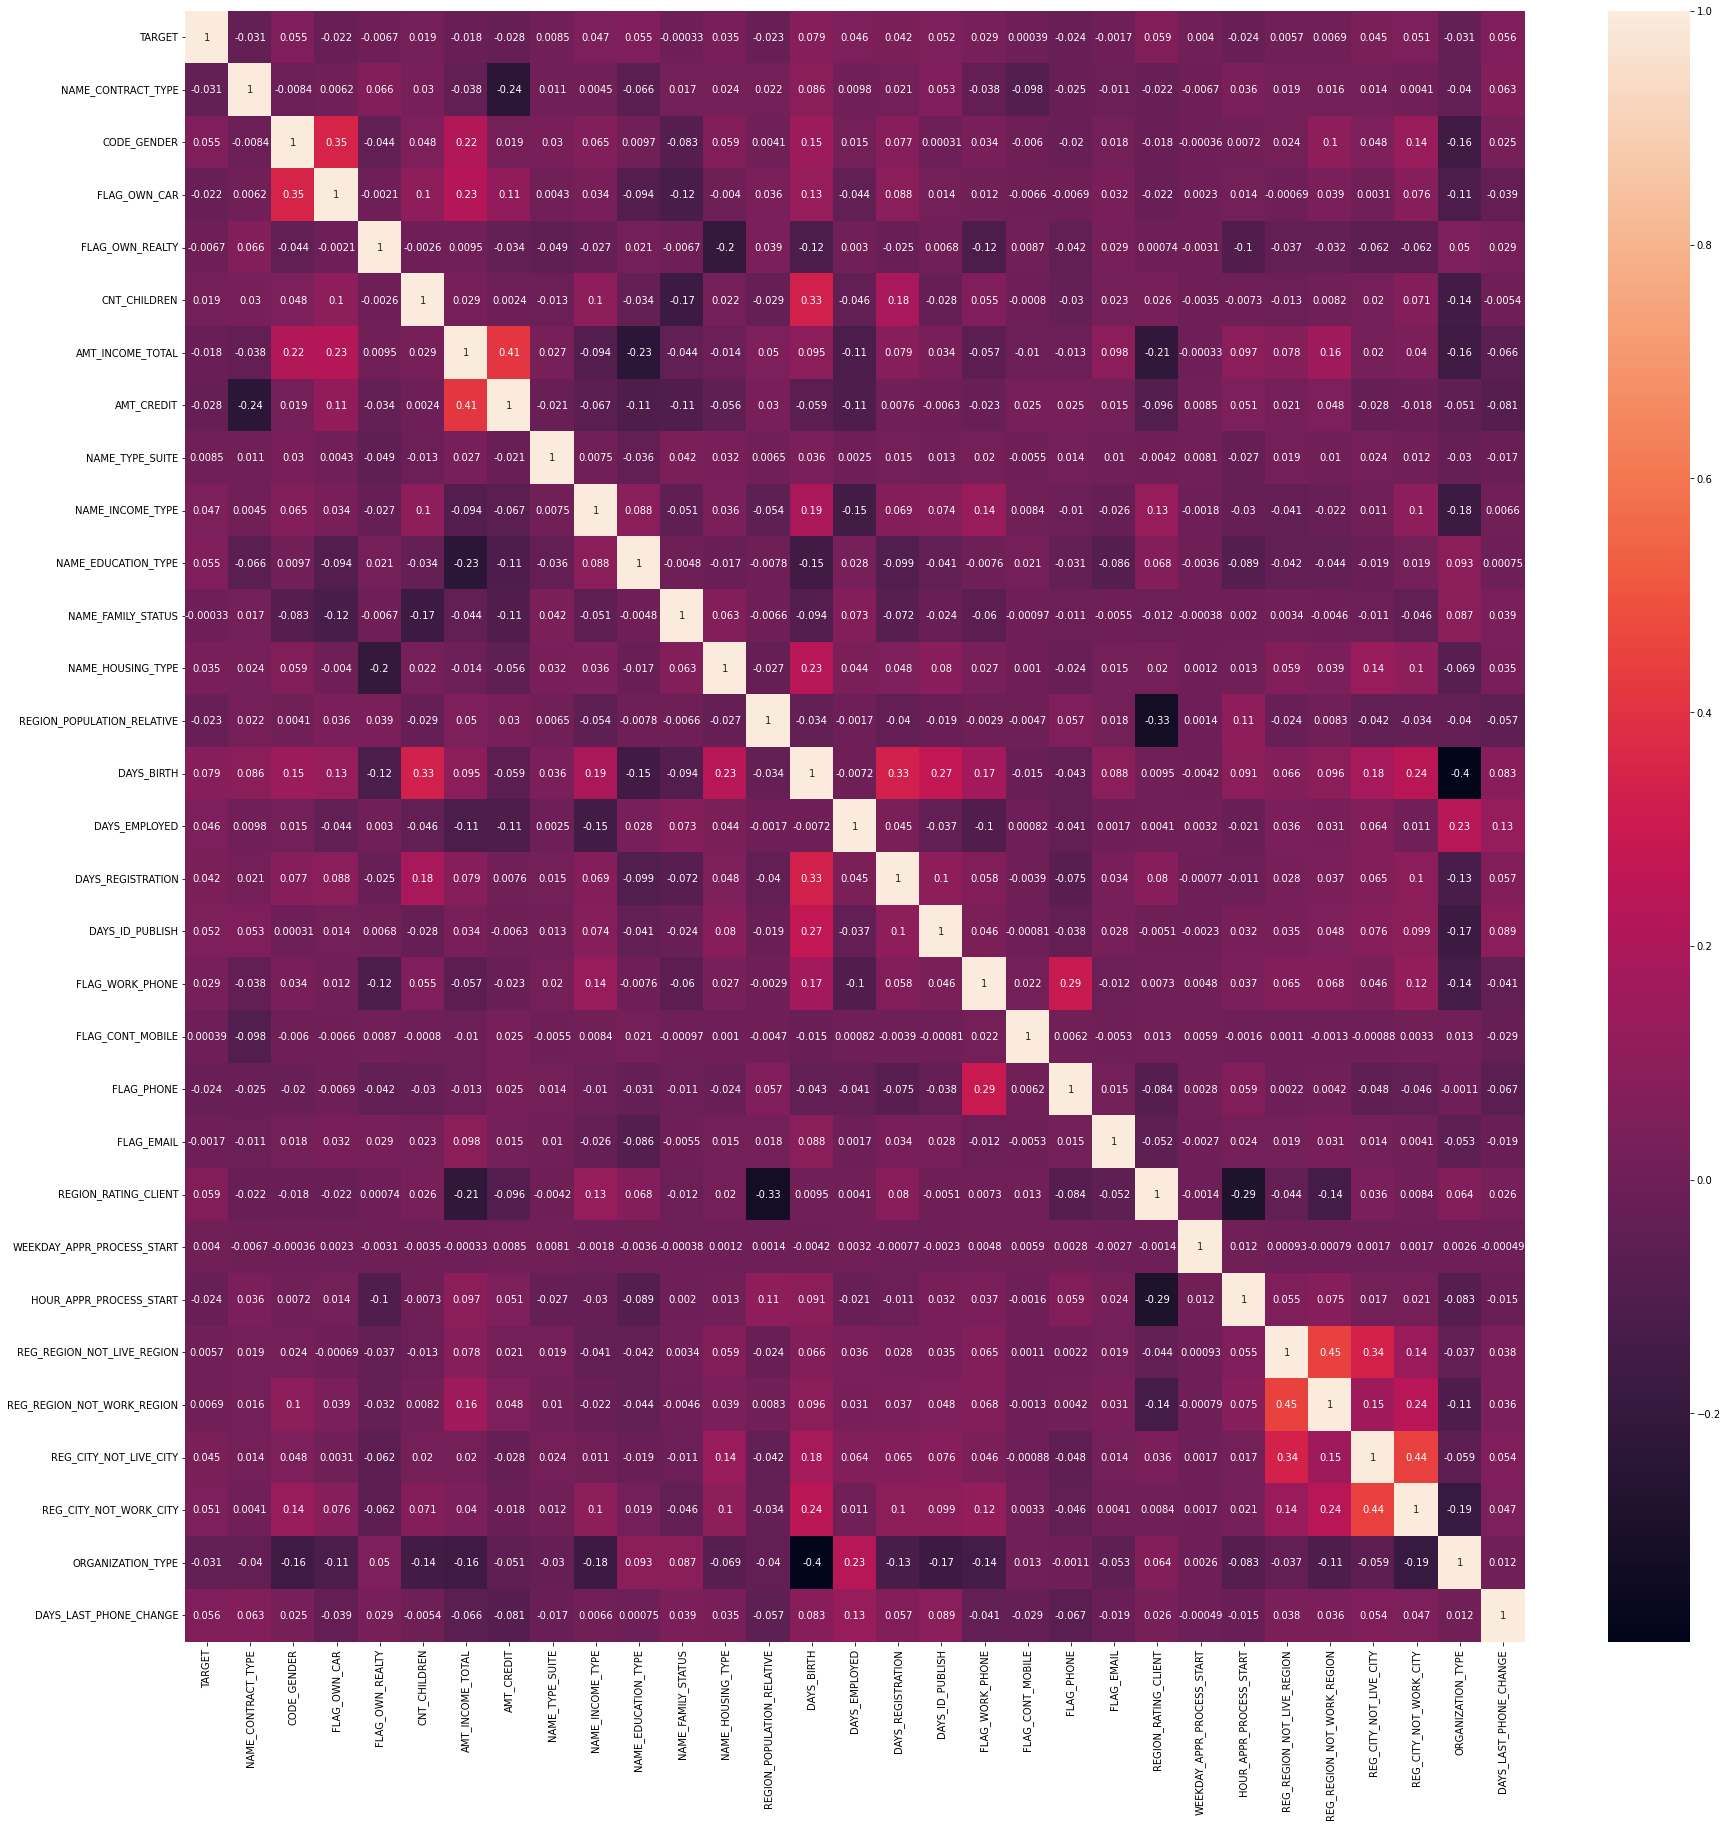

In [71]:
plt.figure(figsize=(30,30))
sns.heatmap(train_model.corr(), annot=True)
plt.show()

In [72]:
corr_matrix = train_model.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_hicorr

<ipython-input-72-8e5e5d6cae8a>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


[]

In [73]:
train_model.drop(to_drop_hicorr, axis=1, inplace=True)

In [74]:
check_missing = test.isnull().sum() * 100 / test.shape[0]
check_missing

NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
REGION_POPULATION_RELATIVE    0.0
DAYS_BIRTH                    0.0
DAYS_EMPLOYED                 0.0
DAYS_REGISTRATION             0.0
DAYS_ID_PUBLISH               0.0
FLAG_WORK_PHONE               0.0
FLAG_CONT_MOBILE              0.0
FLAG_PHONE                    0.0
FLAG_EMAIL                    0.0
REGION_RATING_CLIENT          0.0
WEEKDAY_APPR_PROCESS_START    0.0
HOUR_APPR_PROCESS_START       0.0
REG_REGION_NOT_LIVE_REGION    0.0
REG_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY        0.0
REG_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE             0.0
DAYS_LAST_PHON

In [75]:
test_model = test.dropna()
test_model.drop(to_drop_hicorr, axis=1, inplace=True)

In [76]:
test_model.shape

(47809, 30)

In [79]:
test_model.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,-0.096268,-0.701413,-0.713094,0.673730,-0.564394,-0.400311,0.345105,0.416648,0.965329,-1.624760,-0.402892,-0.296885,0.311884,-0.747121,-0.232258,-0.089747,1.428510,-0.509923,0.040425,-0.599119,2.274048,-0.073025,0.815560,1.826748,-0.138827,-0.242194,-0.290007,-0.538750,-0.097314,-0.759529
1,-0.096268,1.425694,-0.713094,0.673730,-0.564394,-1.119122,-0.956547,0.416648,0.965329,0.646132,-0.402892,-0.296885,1.010817,-0.476792,-1.321681,-1.230158,0.910242,-0.509923,0.040425,-0.599119,-0.439745,-0.073025,-1.513853,-0.918350,-0.138827,-0.242194,-0.290007,-0.538750,0.584609,1.231653
3,-0.096268,-0.701413,-0.713094,0.673730,2.279826,1.396717,2.278871,0.416648,0.965329,0.646132,-0.402892,-0.296885,0.761198,0.484566,0.008718,0.854074,-0.740421,-0.509923,0.040425,1.669117,-0.439745,-0.073025,1.281443,-0.308328,-0.138827,-0.242194,-0.290007,-0.538750,-1.217616,-0.833912
4,-0.096268,1.425694,1.402339,-1.484274,0.857716,0.367510,0.532244,0.416648,0.965329,0.646132,-0.402892,-0.296885,-0.536819,0.705988,-0.160759,0.258579,-0.774929,1.961080,0.040425,-0.599119,-0.439745,-0.073025,-1.513853,-2.138394,-0.138827,-0.242194,-0.290007,1.856147,-1.217616,0.292136
5,-0.096268,-0.701413,1.402339,0.673730,-0.564394,1.184341,1.473482,0.416648,-0.385655,0.646132,-0.402892,-0.296885,0.711274,-0.600155,-3.051941,-0.369129,0.652705,-0.509923,0.040425,1.669117,-0.439745,-0.073025,-1.047971,0.911715,-0.138827,-0.242194,-0.290007,-0.538750,-0.925363,-0.719477


In [77]:
train_model.shape

(306206, 31)

In [78]:
train_model.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,1,-0.323406,1.388480,-0.718049,0.662310,-0.578173,0.792004,-0.508967,0.439447,0.915434,0.624394,1.545092,-0.305327,0.265941,1.508251,0.580435,0.380671,0.579234,-0.498524,0.043337,1.600529,-0.245387,-0.103388,1.353541,-0.631306,-0.124069,-0.23119,-0.291175,-0.54728,-1.195034,-0.205329
1,0,-0.323406,-0.720129,-0.718049,-1.509868,-0.578173,1.333009,1.826131,-2.376418,-0.263736,-1.686749,-0.410189,-0.305327,-2.343874,-0.165810,0.335295,1.082696,1.791000,-0.498524,0.043337,1.600529,-0.245387,-2.067646,-0.972416,-0.325136,-0.124069,-0.23119,-0.291175,-0.54728,0.466426,0.164971
2,0,3.092089,1.388480,1.392664,0.662310,-0.578173,-1.656570,-1.223732,0.439447,0.915434,0.624394,1.545092,-0.305327,-0.537079,-0.688754,0.763734,0.206163,0.306935,2.005922,0.043337,1.600529,-0.245387,-0.103388,-0.972416,-0.937476,-0.124069,-0.23119,-0.291175,-0.54728,-0.901835,0.180703
3,0,-0.323406,-0.720129,-0.718049,0.662310,-0.578173,-0.212720,-0.772066,0.439447,0.915434,0.624394,-1.387829,-0.305327,-1.189533,-0.679354,-0.488215,-1.382945,0.369212,-0.498524,0.043337,-0.624793,-0.245387,-0.103388,1.353541,1.511882,-0.124069,-0.23119,-0.291175,-0.54728,-1.195034,0.420309
4,0,-0.323406,1.388480,-0.718049,0.662310,-0.578173,-0.476196,-0.180279,0.439447,0.915434,0.624394,1.545092,-0.305327,0.818017,-0.891879,-0.487770,0.191621,-0.307230,-0.498524,0.043337,-0.624793,-0.245387,-0.103388,0.423158,-0.325136,-0.124069,-0.23119,-0.291175,1.82722,0.368693,-0.171445


In [80]:
from sklearn.model_selection import train_test_split

X = train_model.drop('TARGET', axis=1)
y = train_model['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
X_train.shape, X_test.shape

((244964, 30), (61242, 30))

In [82]:
print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape)
print('Jumlah baris dan kolom dari y_train adalah:', y_train.shape[0])
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('\nJumlah baris dan kolom dari x_test adalah:', X_test.shape)
print('Jumlah baris dan kolom dari y_test adalah:', y_test.shape[0])
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (244964, 30)
Jumlah baris dan kolom dari y_train adalah: 244964
Prosentase Churn di data Training adalah:
0    0.919494
1    0.080506
Name: TARGET, dtype: float64

Jumlah baris dan kolom dari x_test adalah: (61242, 30)
Jumlah baris dan kolom dari y_test adalah: 61242
Prosentase Churn di data Testing adalah:
0    0.917802
1    0.082198
Name: TARGET, dtype: float64


## **Build Model**

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score, auc
from sklearn.model_selection import KFold, cross_val_score

In [84]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [85]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
13,DAYS_BIRTH,0.156400
9,NAME_EDUCATION_TYPE,0.144906
14,DAYS_EMPLOYED,0.141255
29,DAYS_LAST_PHONE_CHANGE,0.086891
8,NAME_INCOME_TYPE,0.083750
1,CODE_GENDER,0.076310
16,DAYS_ID_PUBLISH,0.052595
21,REGION_RATING_CLIENT,0.049619
27,REG_CITY_NOT_WORK_CITY,0.040999
6,AMT_CREDIT,0.033793


In [86]:
#Train the model
rfc_model = RandomForestClassifier().fit(X_train, y_train)

# Predict
y_train_pred = rfc_model.predict(X_train)

# Print classification report 
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred))
print('\nF1 Score Training (Random Forest Classifier): %.3f' % (f1_score(y_train, y_train_pred)))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
print('\nROC AUC Score Training (Random Forest Classifier): %.3f' % train_auc)
print('\n')

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225243
           1       1.00      1.00      1.00     19721

    accuracy                           1.00    244964
   macro avg       1.00      1.00      1.00    244964
weighted avg       1.00      1.00      1.00    244964


F1 Score Training (Random Forest Classifier): 1.000

ROC AUC Score Training (Random Forest Classifier): 1.000




In [87]:
# Predict
y_test_pred = rfc_model.predict(X_test)

# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))
print('\nF1 Score Testing (Random Forest Classifier): %.3f' % (f1_score(y_test, y_test_pred)))
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print('\nROC AUC Score Testing (Random Forest Classifier): %.3f' % test_auc)
print('\n')

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56208
           1       1.00      0.00      0.00      5034

    accuracy                           0.92     61242
   macro avg       0.96      0.50      0.48     61242
weighted avg       0.92      0.92      0.88     61242


F1 Score Testing (Random Forest Classifier): 0.001

ROC AUC Score Testing (Random Forest Classifier): 0.500




In [88]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

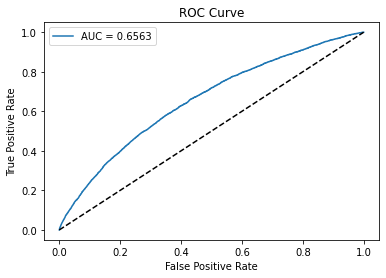

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [90]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [91]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,281005,0,0.040589,1,0,1,0.000016,0.0,0.000018
1,152058,0,0.041641,2,0,2,0.000033,0.0,0.000036
2,45510,0,0.042610,3,0,3,0.000049,0.0,0.000053
3,52436,0,0.042660,4,0,4,0.000065,0.0,0.000071
4,169666,0,0.042762,5,0,5,0.000082,0.0,0.000089


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.2303')

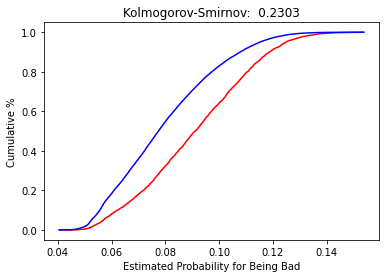

In [92]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

## **Prediction**

In [93]:
X_train = StandardScaler().fit_transform(train.drop(columns='TARGET'))
Y_train = train['TARGET'].values
X_test = StandardScaler().fit_transform(test)

print('X_train shape: {}'.format(X_train.shape))
print('Y_train shape: {}'.format(Y_train.shape[0]))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (306206, 30)
Y_train shape: 306206
X_test shape: (47809, 30)


In [94]:
import sys

np.set_printoptions(threshold=sys.maxsize)

y_test_pred = rfc.predict(X_test)
print(y_test_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [97]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_val_score(rfc, X_train, Y_train, cv=kfold, scoring = "accuracy")
print("Accuracy Random Forest Classifier Scores:", scores)
print("Accuracy Random Forest Classifier Mean:", scores.mean())
print("Accuracy Random Forest Classifier Standard Deviation:", scores.std())
print("\n")
scores2 = cross_val_score(rfc, X_train, Y_train, cv=kfold, scoring = "roc_auc")
print("ROC AUC Random Forest Classifier Scores:", scores2)
print("ROC AUC Random Forest Classifier Mean:", scores2.mean())
print("ROC AUC Random Forest Classifier Standard Deviation:", scores2.std())

Accuracy Random Forest Classifier Scores: [0.91763822 0.9179648  0.91678913 0.91580941 0.92305934 0.91763822
 0.9211953  0.92145656 0.92047681 0.91952972]
Accuracy Random Forest Classifier Mean: 0.9191557514724966
Accuracy Random Forest Classifier Standard Deviation: 0.002222601553073549


ROC AUC Random Forest Classifier Scores: [0.64824512 0.65868494 0.65244754 0.64525209 0.65792108 0.65890248
 0.64965701 0.65819775 0.65590843 0.66488043]
ROC AUC Random Forest Classifier Mean: 0.6550096864291466
ROC AUC Random Forest Classifier Standard Deviation: 0.005672092674163555
